In [2]:
from scenedetect import detect, ThresholdDetector, ContentDetector, SceneManager, open_video
import matplotlib.pyplot as plt
import time
import numpy as np
import face_recognition
import dlib
import cv2

video_path = '/opt/ml/input/final-project-level3-cv-10/data/sample1_0-300s.mp4'

cap = cv2.VideoCapture(video_path)
frame_num = 0
last_frame = None
start_frame_num = 0
min_scene_frames = 15
timelines = []
total_target_frames = 100
down_scale_factor = 10
transition_threshold = 100
frames = []
start_time = time.time()

while True:
    success, cur_frame = cap.read()
    if not success:
        break
        
    cur_frame = cur_frame[::down_scale_factor, ::down_scale_factor, :]
        
    if last_frame is None:
        last_frame = cur_frame
        start_frame_num = frame_num
        frame_num += 1
        continue
    
    num_pixels = cur_frame.shape[0] * cur_frame.shape[1]
    rgb_distance = np.abs(cur_frame - last_frame) / float(num_pixels)
    rgb_distance = rgb_distance.sum() / 3.0
    last_frame = cur_frame

    if rgb_distance > transition_threshold and frame_num - start_frame_num > min_scene_frames:
        timelines.append((start_frame_num, frame_num - 1))
        start_frame_num = frame_num
        
    frame_num += 1
    
end_time = time.time()
print(end_time - start_time)

timelines

17.58745288848877


[(0, 62),
 (63, 121),
 (122, 159),
 (160, 202),
 (203, 230),
 (231, 260),
 (261, 330),
 (331, 431),
 (432, 511),
 (512, 671),
 (672, 707),
 (708, 761),
 (762, 811),
 (812, 885),
 (886, 950),
 (951, 974),
 (975, 1019),
 (1020, 1035),
 (1036, 1119),
 (1120, 1213),
 (1214, 1292),
 (1293, 1333),
 (1334, 1371),
 (1372, 1407),
 (1408, 1449),
 (1450, 1492),
 (1493, 1520),
 (1521, 1588),
 (1589, 1629),
 (1630, 1663),
 (1664, 1711),
 (1712, 1781),
 (1782, 1851),
 (1852, 1867),
 (1868, 1907),
 (1908, 1942),
 (1943, 1973),
 (1974, 2013),
 (2014, 2066),
 (2067, 2130),
 (2131, 2182),
 (2183, 2233),
 (2234, 2280),
 (2281, 2324),
 (2325, 2380),
 (2381, 2425),
 (2426, 2487),
 (2488, 2581),
 (2582, 2648),
 (2649, 2685),
 (2686, 2754),
 (2755, 2838),
 (2839, 2895),
 (2896, 2935),
 (2936, 3022),
 (3023, 3067),
 (3068, 3114),
 (3115, 3230),
 (3231, 3271),
 (3272, 3357),
 (3358, 3439),
 (3440, 3507),
 (3508, 3559),
 (3560, 3590),
 (3591, 3639),
 (3640, 3670),
 (3671, 3736),
 (3737, 3828),
 (3829, 3861),
 (

In [4]:
import matplotlib.pyplot as plt
import cv2

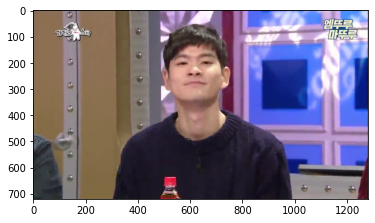

In [10]:
video_path = '/opt/ml/input/final-project-level3-cv-10/data/sample1_0-300s.mp4'

cap = cv2.VideoCapture(video_path)

cnt = 0

while True:
    success, cur_frame = cap.read()
    cur_frame = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2RGB)
    if not success:
        break
        
    if cnt == 1119:
        plt.imshow(cur_frame)
        break
        
    cnt += 1
        